In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import norm
import math 
import qutip as qt
from scipy.optimize import curve_fit

from scipy.stats import norm

import scipy.integrate as integrate

from scipy.signal import argrelextrema #Til opgave 2a
import seaborn

# local imports
from simulate_von_neumann import *

# set theme
seaborn.set_style('ticks')


seaborn.set(font_scale=1.25)

%reload_ext autoreload 
%autoreload 2

**To do:** 
- Detection error and measurement error are fractions and needs to sum to one or less right now!!! Perhaps we need to change it. Seems like it is not working proberly right now! 
- Decide finally on a measurement and error rate(!)

In [75]:
#Constant for all simulations in this experiment
#Simulation parameters
N_sim = 1000
N = 100
delta_t = 1

#System / meter parameters:
a0 = 1/(np.sqrt(2))+0j
b0 = np.sqrt(1-abs(a0)**2)
sigma = 1
g = sigma/4
epsilon = [0,(2*np.pi*g)/(sigma*N*40)]

rtot = 0.99 #total sucess rate
#detector and measurement success rates. 
rm = [1,rtot,rtot*0.5] #without measurement noise, with measurement noise
rd = [0,rtot,rtot*0.5] 
t_span = np.linspace(0,N*delta_t-1,N)

In [76]:
# Simulation 1: Weak measurement
x1,a1,b1= Xeuler_sim(N_sim,N,g, epsilon[0], a0,b0,rm[0],rd[0])

# Simulation 2: Weak measurement with slow rabi oscilation
x2,a2,b2= Xeuler_sim(N_sim,N,g, epsilon[1], a0,b0,rm[0],rd[0])

# Simulation 3: Weak measurement with slow rabi oscilation, measurement error
x3,a3,b3= Xeuler_sim(N_sim,N,g, epsilon[1], a0,b0,rm[1],rd[0])

# Simulation 4: Weak measurement with slow rabi oscilation, equal measurement and detection error
x4,a4,b4= Xeuler_sim(N_sim,N,g, epsilon[1], a0,b0,rm[0],rd[1])


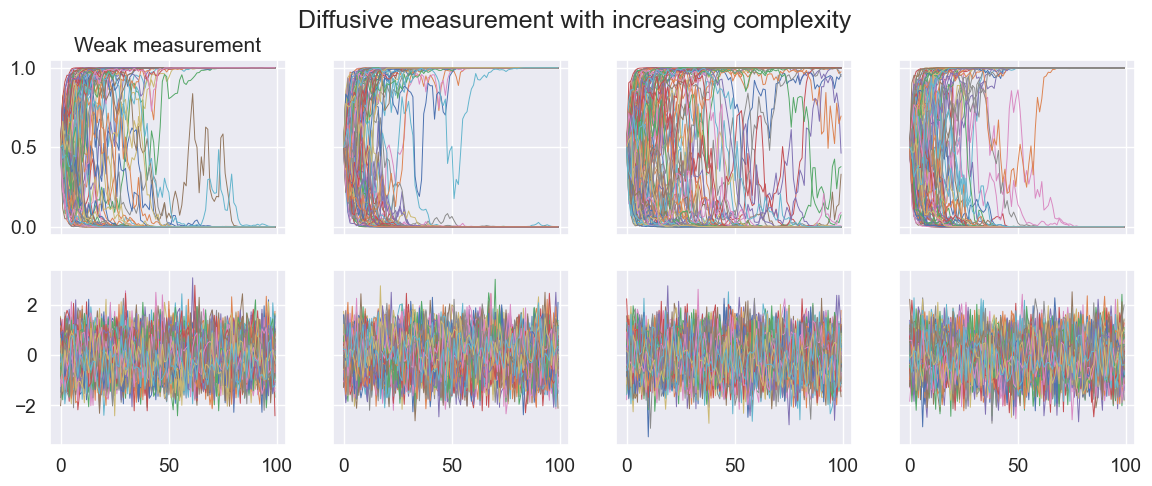

In [77]:
fig, ax = plt.subplots(2,4,figsize=(14,5),sharex='col', sharey='row')

fig.suptitle('Diffusive measurement with increasing complexity')

for i in range(N):
    #Simulation 1
    ax[0,0].set_title('Weak measurement')
    ax[0,0].plot(t_span,abs(a1[i][:-1])**2,linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,0].plot(x1[i]['t'],x1[i]['X'],linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    #Simulation 2
    ax[0,1].plot(t_span,abs(a2[i][:-1])**2,linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,1].plot(x2[i]['t'],x2[i]['X'],linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    #Simulation 3
    ax[0,2].plot(t_span,abs(a3[i][:-1])**2,linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,2].plot(x3[i]['t'],x3[i]['X'],linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    #Simulation 4
    ax[0,3].plot(t_span,abs(a4[i][:-1])**2,linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,3].plot(x4[i]['t'],x4[i]['X'],linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')